<a href="https://colab.research.google.com/github/antonellafontanetto/Pre-Entrega-2-Data-Science/blob/main/Notebook/Proyecto4x4_YPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 4x4 YPF: Primer Pilar Vaca Muerta a corto plazo

El siguiente proyecto está focalizado en predecir el comportamiento de determinadas variables en el marco del proyecto 4x4 de YPF, el cual consta de cuadriplicar la empresa en los próximos 4 años a través de la expansión de la producción, eficiencia en los procesos y mayor foco en la generación de valor.

Para lo cual el proyecta va a constar del siguiente procedimiento:

1) Recolección de Datos

2) Exploración y Procesamiento de los datos (exploración de los datos, discreción de variables, normalización, limpieza, visualización previa)

3) Modelado (construir y testear modelos para predecir o clasificar información o encontrar patrones de datos)

4) Puesta en Producción (predecir nuevos datos, comunicar los resultados, integrar los resultados con aplicación)

# Recolección de datos

Importo todas las libreras necesarias para la recolección de datos y el análisis exploratorio.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Este dataset que se incorpora es de producción de pozos de gas y petroleo no convencional, el mismo se obtuvo desde la pagina de Secretaría de Energía

In [ ]:
#Se utilizo la función usecols para extraer las features mas reelevantes del dataset
produccion = pd.read_csv('/content/produccion.zip', usecols=['anio','idpozo','empresa','tipopozo','tipoestado','prod_gas','prod_pet','profundidad','areayacimiento','cuenca','provincia','tipo_de_recurso','sub_tipo_recurso','prod_agua','tipoextraccion','profundidad','areapermisoconcesion','coordenadax','coordenaday','proyecto','clasificacion','subclasificacion'])
produccion

,anio,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,empresa,profundidad,...,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso
0,2018,132488,0.000000,171.937000,0.000000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,3828.0,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.864960,-39.016722,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
1,2017,130021,0.000000,245.850000,16.680000,Plunger Lift,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,2338.4,...,ANTICLINAL CAMPAMENTO SUR,NEUQUINA,Neuquén,-69.733102,-39.024859,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
2,2018,132487,0.000000,514.696000,17.000000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,2707.0,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.837875,-39.019313,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
3,2015,137212,0.000000,422.110000,0.000000,Bombeo Mecánico,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,3305.0,...,GUANACO,NEUQUINA,Neuquén,-69.255971,-38.860779,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
4,2018,132361,0.000000,217.103000,7.300000,Surgencia Natural,Extracción Efectiva,Gasífero,YSUR ENERGÍA ARGENTINA S.R.L.,2618.0,...,GUANACO,NEUQUINA,Neuquén,-69.231360,-38.869270,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345377,2024,3640,14.049906,17.378994,72.385001,Bombeo Mecánico,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,2585.0,...,EL CARACOL,NEUQUINA,Neuquén,-68.452390,-37.954170,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE
345378,2023,164872,0.000000,0.000000,0.000000,NaN,NaN,NaN,Petrolera Aconcagua Energia S.A.,2848.0,...,CHARCO BAYO,NEUQUINA,Rio Negro,-68.099940,-38.174340,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
345379,2024,164374,60.960855,602.844409,63.852351,Surgencia Natural,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,2840.0,...,CHARCO BAYO,NEUQUINA,Rio Negro,-68.106619,-38.178494,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT
345380,2024,164873,0.000000,0.000000,0.000000,Surgencia Natural,Parado Transitoriamente,Gasífero,Petrolera Aconcagua Energia S.A.,2400.0,...,CHARCO BAYO,NEUQUINA,Rio Negro,-68.129670,-38.149710,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT


In [ ]:
#Filtro por cada dataset solo los registros para YPF S.A.
prod_ypf = produccion[(produccion['empresa'] == 'YPF S.A.')&(produccion['cuenca'] == 'NEUQUINA')&(produccion['anio']>2022)]

prod_ypf

,anio,idpozo,prod_pet,prod_gas,prod_agua,tipoextraccion,tipoestado,tipopozo,empresa,profundidad,...,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso
8572,2025,153522,32.29,172.10,0.00,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,3844.0,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.810843,-39.024083,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
8578,2025,156742,0.00,0.00,0.00,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,2827.0,...,EL OREJANO,NEUQUINA,Neuquén,-69.179098,-38.009987,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8584,2025,156744,0.00,0.00,0.00,Bombeo Mecánico,En Estudio,Otro tipo,YPF S.A.,2977.0,...,LA AMARGA CHICA,NEUQUINA,Neuquén,-68.748543,-38.176774,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8590,2025,155827,0.00,0.00,0.00,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,4092.0,...,EL OREJANO,NEUQUINA,Neuquén,-69.200359,-37.958765,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8596,2025,156756,55.99,3.37,0.00,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,4945.0,...,LOMA CAMPANA,NEUQUINA,Neuquén,-68.678007,-38.329983,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,166128,0.00,0.00,0.00,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,2046.0,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.525949,-38.122077,NO CONVENCIONAL,Sin Proyecto,SERVICIO,CONTROL,SHALE
199440,2024,166126,1642.63,101.18,1102.79,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,5889.0,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558082,-38.076855,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199442,2024,166127,2441.10,153.31,1287.65,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,0.0,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558013,-38.076854,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199446,2024,166133,0.00,0.00,0.00,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,4491.0,...,LAS TACANAS,NEUQUINA,Neuquén,-69.335181,-38.710951,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


In [ ]:
#Con rename se logró renombrar las columnas que tenían nombres abreviados o poco legibles
prod_ypf=prod_ypf.rename(columns={'anio':'Año','idpozo':'ID pozo','prod_pet':'Produccion de Petroleo','prod_gas':'Produccion de Gas','prod_agua':'Produccion de agua','tipoextraccion':'Tipo de extraccion','tipoestado':'Tipo de estado','tipopozo':'Tipo de pozo','empresa':'Empresa','profundidad':'Profundidad','areapermisoconcesion':'Area de permiso de concesion','cuenca':'Cuenca','provincia':'Provincia','tipo_de_recurso':'Tipo de recurso','proyecto':'Proyecto','clasificacion':'Clasificacion','subclasificacion':'Subclasificacion','sub_tipo_recurso':'Subtipo de recurso'})
prod_ypf

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,153522,32.29,172.10,0.00,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,3844.0,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.810843,-39.024083,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
8578,2025,156742,0.00,0.00,0.00,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,2827.0,...,EL OREJANO,NEUQUINA,Neuquén,-69.179098,-38.009987,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8584,2025,156744,0.00,0.00,0.00,Bombeo Mecánico,En Estudio,Otro tipo,YPF S.A.,2977.0,...,LA AMARGA CHICA,NEUQUINA,Neuquén,-68.748543,-38.176774,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8590,2025,155827,0.00,0.00,0.00,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,4092.0,...,EL OREJANO,NEUQUINA,Neuquén,-69.200359,-37.958765,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8596,2025,156756,55.99,3.37,0.00,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,4945.0,...,LOMA CAMPANA,NEUQUINA,Neuquén,-68.678007,-38.329983,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,166128,0.00,0.00,0.00,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,YPF S.A.,2046.0,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.525949,-38.122077,NO CONVENCIONAL,Sin Proyecto,SERVICIO,CONTROL,SHALE
199440,2024,166126,1642.63,101.18,1102.79,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,5889.0,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558082,-38.076855,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199442,2024,166127,2441.10,153.31,1287.65,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,0.0,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558013,-38.076854,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199446,2024,166133,0.00,0.00,0.00,Surgencia Natural,Parado Transitoriamente,Gasífero,YPF S.A.,4491.0,...,LAS TACANAS,NEUQUINA,Neuquén,-69.335181,-38.710951,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


# Análisis exploratorio de datos

In [ ]:
#Vamos a ver que tipo de estructura tiene prod_ypf
type(prod_ypf)

pandas.core.frame.DataFrame

In [ ]:
#Con la función shape podemos ver cuantas features y registros contiene el dataframe prod_ypf
prod_ypf.shape

(56418, 21)

In [ ]:
#Con la función columns puedo visualizar los nombres de los features
prod_ypf.columns

Index(['Año', 'ID pozo', 'Produccion de Petroleo', 'Produccion de Gas',
       'Produccion de agua', 'Tipo de extraccion', 'Tipo de estado',
       'Tipo de pozo', 'Empresa', 'Profundidad',
       'Area de permiso de concesion', 'areayacimiento', 'Cuenca', 'Provincia',
       'coordenadax', 'coordenaday', 'Tipo de recurso', 'Proyecto',
       'Clasificacion', 'Subclasificacion', 'Subtipo de recurso'],
      dtype='object')

In [ ]:
#A través de la función head() puedo visualizar los primeros 5 registros
prod_ypf.head()

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,153522,32.29,172.10,0.0,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,3844.0,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.810843,-39.024083,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
8578,2025,156742,0.00,0.00,0.0,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,2827.0,...,EL OREJANO,NEUQUINA,Neuquén,-69.179098,-38.009987,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8584,2025,156744,0.00,0.00,0.0,Bombeo Mecánico,En Estudio,Otro tipo,YPF S.A.,2977.0,...,LA AMARGA CHICA,NEUQUINA,Neuquén,-68.748543,-38.176774,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8590,2025,155827,0.00,0.00,0.0,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,4092.0,...,EL OREJANO,NEUQUINA,Neuquén,-69.200359,-37.958765,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8596,2025,156756,55.99,3.37,0.0,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,4945.0,...,LOMA CAMPANA,NEUQUINA,Neuquén,-68.678007,-38.329983,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


In [ ]:
# Mientras que con la función tail(15) puedo visualizar los últimos 15 registros del dataframe
prod_ypf.tail(15)

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
199418,2024,165787,3409.13,645.07,1584.58,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,6061.0,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.726359,-38.305617,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199420,2024,166130,5.33,4.13,569.26,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,5990.0,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.880231,-38.238338,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199422,2024,165795,570.73,166.81,1241.24,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,5405.0,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.705510,-38.313932,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199424,2024,165791,1523.42,445.38,2753.77,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,6248.0,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.705921,-38.313933,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199426,2024,165794,3054.73,987.58,2708.32,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,6501.0,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.705614,-38.313932,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199428,2024,165792,2967.65,980.35,2439.32,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,6336.0,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.705819,-38.313933,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199430,2024,165793,1775.53,542.29,2729.50,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,6427.0,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.705716,-38.313933,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199432,2024,166129,5.03,1.04,403.62,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,6113.0,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.880333,-38.238338,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199434,2024,166125,3904.39,203.65,867.70,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,0.0,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558196,-38.076856,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
199436,2024,166124,2543.15,168.20,950.83,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,6030.0,...,LOMA COLORADA,NEUQUINA,Neuquén,-68.558310,-38.076856,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


In [ ]:
# Con dtypes podemos visualizar los tipos de datos que contiene cada feature (enteros, flotantes y objetos)
prod_ypf.dtypes

,0
Año,int64
ID pozo,int64
Produccion de Petroleo,float64
Produccion de Gas,float64
Produccion de agua,float64
Tipo de extraccion,object
Tipo de estado,object
Tipo de pozo,object
Empresa,object
Profundidad,float64


In [ ]:
# Ahora nos interesa ver cuantos son los datos faltantes por cada feature, en este caso no tenemos datos Nan
datosfaltantes = prod_ypf.isnull().sum()
print (datosfaltantes)

Año                             0
ID pozo                         0
Produccion de Petroleo          0
Produccion de Gas               0
Produccion de agua              0
Tipo de extraccion              0
Tipo de estado                  0
Tipo de pozo                    0
Empresa                         0
Profundidad                     0
Area de permiso de concesion    0
areayacimiento                  0
Cuenca                          0
Provincia                       0
coordenadax                     0
coordenaday                     0
Tipo de recurso                 0
Proyecto                        0
Clasificacion                   0
Subclasificacion                0
Subtipo de recurso              0
dtype: int64


In [ ]:
#Con la función describe puedo obtener todo lo relacionado a la estadística descriptiva (media, desvio estandar, mínimo, máximo, etc) para determinadas features
prod_ypf[['Produccion de Petroleo', 'Produccion de Gas', 'Produccion de agua', 'Profundidad']].describe()

,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Profundidad
count,56418.000000,56418.000000,56418.000000,56418.000000
mean,475.228559,341.947332,187.986783,4111.578969
std,1087.901163,1033.316212,577.349776,8018.702345
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.730000,0.000000,3042.000000
50%,13.740000,60.815000,6.160000,3838.000000
75%,344.087500,237.355000,78.795000,5145.000000
max,10489.260000,17143.070000,24615.830000,378939.000000


Para lo siguiente tratamos de buscar la media de la producción de petróleo y gas por cada año a partir del 2023 hasta el 2025 inclusive.

Analizamos Producción de Petroleo

In [ ]:
prod_ypf_2023=prod_ypf[prod_ypf['Año']==2023]
prod_ypf_2023
media_2023=prod_ypf_2023['Produccion de Petroleo'].mean()
media_2023


np.float64(445.29436681957833)

In [ ]:
prod_ypf_2024=prod_ypf[prod_ypf['Año']==2024]
prod_ypf_2024
media_2024=prod_ypf_2024['Produccion de Petroleo'].mean()
media_2024

np.float64(487.16603230498356)

In [ ]:
prod_ypf_2025=prod_ypf[prod_ypf['Año']==2025]
prod_ypf_2025
media_2025=prod_ypf_2025['Produccion de Petroleo'].mean()
media_2025

np.float64(536.3812050222018)

In [ ]:
#Se utilizo la función groupby para calcular la media de producción de petroleo a partir del año 2023 donde podemos observar que obtuvimos los mismos resultados que en las funciones anteriores
prod_ypf.groupby('Año')['Produccion de Petroleo'].mean()

,Produccion de Petroleo
Año,
2023,445.294367
2024,487.166032
2025,536.381205


In [ ]:
#Máxima producción de petróleo
prod_ypf['Produccion de Petroleo'].max()

10489.26

In [ ]:
#Mínima producción de petróleo
prod_ypf['Produccion de Petroleo'].min()

0.0

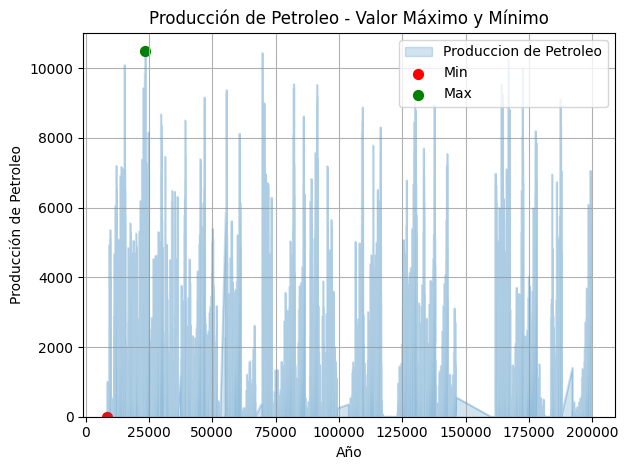

In [ ]:
#Grafico producción de petroleo Max-Min
valor_max = prod_ypf['Produccion de Petroleo'].max()
valor_min = prod_ypf['Produccion de Petroleo'].min()

#Indices correspondientes
indice_min = prod_ypf['Produccion de Petroleo'].idxmin()
indice_max = prod_ypf['Produccion de Petroleo'].idxmax()

#Graficar area
aux = prod_ypf[['Produccion de Petroleo']].plot.area(alpha=0.2)

#Agregar puntos min y max
aux.scatter(indice_min, valor_min, color='red', s=50, label='Min')
aux.scatter(indice_max, valor_max, color='green', s=50, label='Max')

#Etiquetas y leyenda
plt.title('Producción de Petroleo - Valor Máximo y Mínimo')
plt.xlabel('Año')
plt.ylabel('Producción de Petroleo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Analizamos Producción de Gas

In [ ]:
prod_ypf_2023=prod_ypf[prod_ypf['Año']==2023]
prod_ypf_2023
media_2023=prod_ypf_2023['Produccion de Gas'].mean()
media_2023

np.float64(357.7050894322629)

In [ ]:
prod_ypf_2024=prod_ypf[prod_ypf['Año']==2024]
prod_ypf_2024
media_2024=prod_ypf_2024['Produccion de Gas'].mean()
media_2024

np.float64(330.18669294955214)

In [ ]:
prod_ypf_2025=prod_ypf[prod_ypf['Año']==2025]
prod_ypf_2025
media_2025=prod_ypf_2025['Produccion de Gas'].mean()
media_2025

np.float64(331.6638217730822)

In [ ]:
prod_ypf.groupby('Año')['Produccion de Gas'].mean()

,Produccion de Gas
Año,
2023,357.705089
2024,330.186693
2025,331.663822


In [ ]:
#Máxima producción de gas
prod_ypf['Produccion de Gas'].max()

17143.07

In [ ]:
#Mínima producción de gas
prod_ypf['Produccion de Gas'].min()

0.0

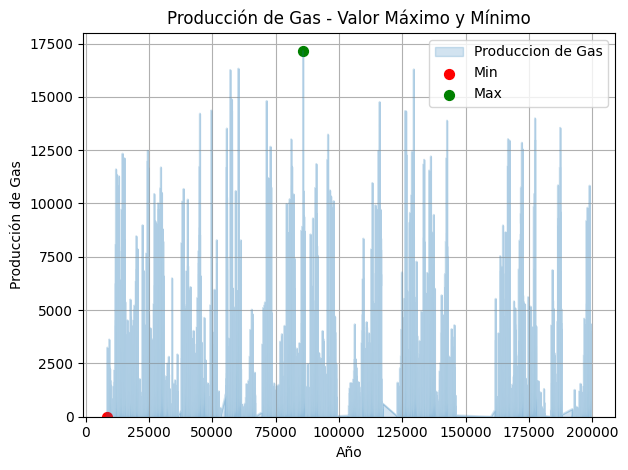

In [ ]:
#Grafico produccion de Gas Max-Min
valor_max = prod_ypf['Produccion de Gas'].max()
valor_min = prod_ypf['Produccion de Gas'].min()

#Indices correspondientes
indice_min = prod_ypf['Produccion de Gas'].idxmin()
indice_max = prod_ypf['Produccion de Gas'].idxmax()

#Graficar area
aux = prod_ypf[['Produccion de Gas']].plot.area(alpha=0.2)

#Agregar puntos min y max
aux.scatter(indice_min, valor_min, color='red', s=50, label='Min')
aux.scatter(indice_max, valor_max, color='green', s=50, label='Max')

#Etiquetas y leyenda
plt.title('Producción de Gas - Valor Máximo y Mínimo')
plt.xlabel('Año')
plt.ylabel('Producción de Gas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Para este caso, calculamos la media por año para las features Producción de Petróleo y Producción de Gas pero sin los ceros que contengan los registros

In [ ]:
media_2023 = prod_ypf[(prod_ypf["Año"] == 2023) & (prod_ypf["Produccion de Petroleo"] != 0)]["Produccion de Petroleo"].mean()
print(media_2023)

686.9652934683807


In [ ]:
media_2024 = prod_ypf[(prod_ypf["Año"] == 2024) & (prod_ypf["Produccion de Petroleo"] != 0)]["Produccion de Petroleo"].mean()
print(media_2024)

729.1721432254368


In [ ]:
media_2025 = prod_ypf[(prod_ypf["Año"] == 2025) & (prod_ypf["Produccion de Petroleo"] != 0)]["Produccion de Petroleo"].mean()
print(media_2025)

802.1767002518892


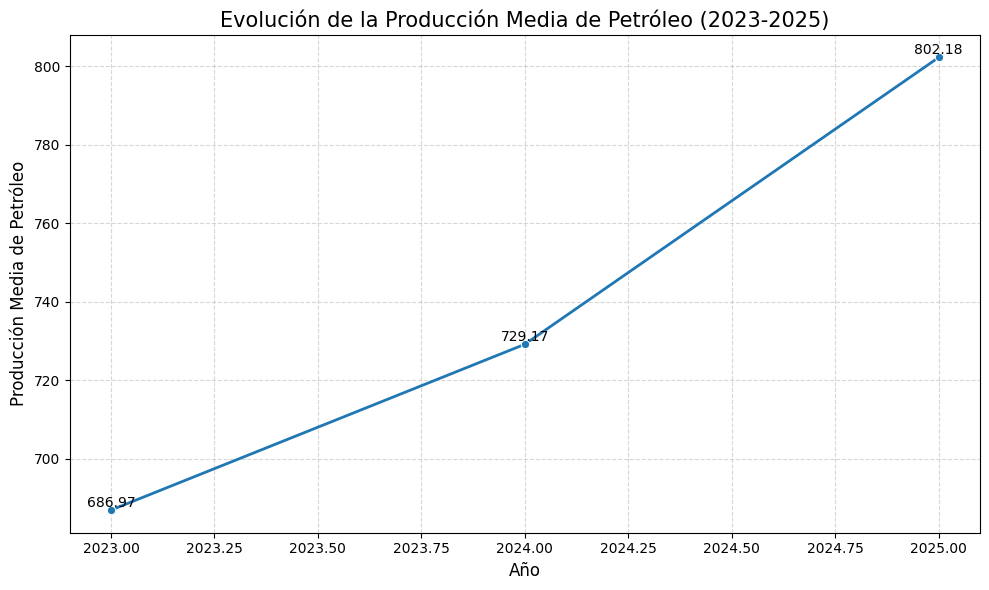

In [ ]:
#Grafico para visualizar el crecimiento de la media en los ultimos años en la Producción de Petroleo
media_2023 = prod_ypf[(prod_ypf["Año"] == 2023) & (prod_ypf["Produccion de Petroleo"] != 0)]["Produccion de Petroleo"].mean()
media_2024 = prod_ypf[(prod_ypf["Año"] == 2024) & (prod_ypf["Produccion de Petroleo"] != 0)]["Produccion de Petroleo"].mean()
media_2025 = prod_ypf[(prod_ypf["Año"] == 2025) & (prod_ypf["Produccion de Petroleo"] != 0)]["Produccion de Petroleo"].mean()

#Creo diccionario
resultados = {
    'Año': [2023, 2024, 2025],
    'Producción Media de Petróleo': [media_2023, media_2024, media_2025]
}

tabla_resultados = pd.DataFrame(resultados)
#Tamaño del grafico
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Producción Media de Petróleo', data=tabla_resultados, marker='o', linewidth=2)


plt.title('Evolución de la Producción Media de Petróleo (2023-2025)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Media de Petróleo', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

#Valores en cada punto
for i, row in tabla_resultados.iterrows():
    plt.text(row['Año'], row['Producción Media de Petróleo'],
             f"{row['Producción Media de Petróleo']:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
media_2023_gas = prod_ypf[(prod_ypf["Año"] == 2023) & (prod_ypf["Produccion de Gas"] != 0)]["Produccion de Gas"].mean()
print(media_2023_gas)

462.4030591371525


In [ ]:
media_2024_gas = prod_ypf[(prod_ypf["Año"] == 2024) & (prod_ypf["Produccion de Gas"] != 0)]["Produccion de Gas"].mean()
print(media_2024_gas)

435.48172749760204


In [ ]:
media_2025_gas = prod_ypf[(prod_ypf["Año"] == 2025) & (prod_ypf["Produccion de Gas"] != 0)]["Produccion de Gas"].mean()
print(media_2025_gas)

429.6957786153541


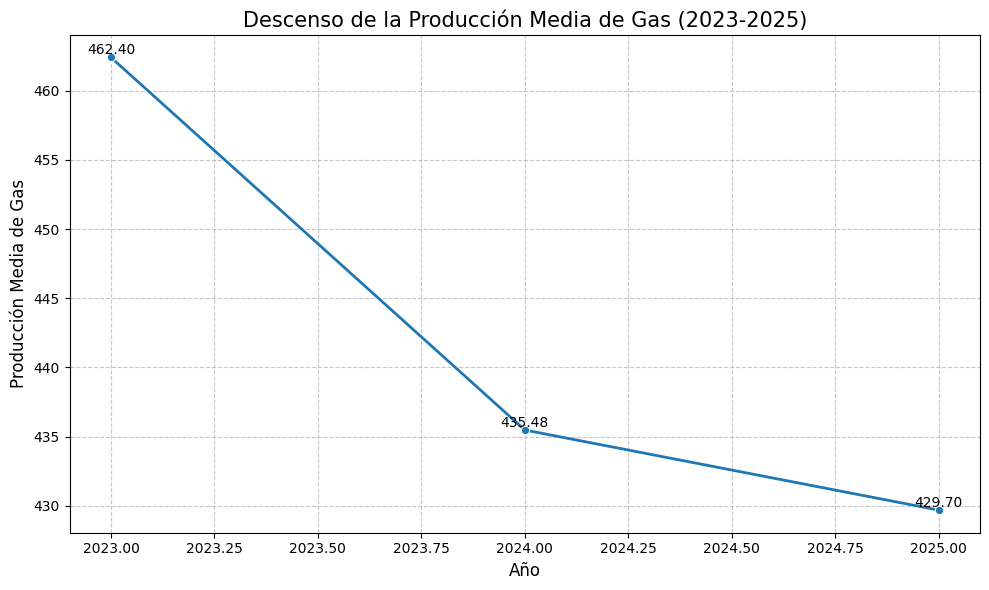

In [ ]:
#Grafico para visualizar el descenso de la media en los ultimos años en la Producción de Gas
media_2023 = prod_ypf[(prod_ypf["Año"] == 2023) & (prod_ypf["Produccion de Gas"] != 0)]["Produccion de Gas"].mean()
media_2024 = prod_ypf[(prod_ypf["Año"] == 2024) & (prod_ypf["Produccion de Gas"] != 0)]["Produccion de Gas"].mean()
media_2025 = prod_ypf[(prod_ypf["Año"] == 2025) & (prod_ypf["Produccion de Gas"] != 0)]["Produccion de Gas"].mean()

#Creo diccionario
resultados = {
    'Año': [2023, 2024, 2025],
    'Producción Media de Gas': [media_2023, media_2024, media_2025]
}

tabla_resultados = pd.DataFrame(resultados)
#Tamaño del grafico
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Producción Media de Gas', data=tabla_resultados, marker='o', linewidth=2)


plt.title('Descenso de la Producción Media de Gas (2023-2025)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Media de Gas', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

#Valores en cada punto
for i, row in tabla_resultados.iterrows():
    plt.text(row['Año'], row['Producción Media de Gas'],
             f"{row['Producción Media de Gas']:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Vamos a ver que valores están incluidas en cada categoría

In [ ]:
#Para el caso de tipo de pozo podemos ver las diferentes categorías y el conteo de las mismas
prod_ypf.groupby('Tipo de estado')['Tipo de estado'].count()

,Tipo de estado
Tipo de estado,
A Abandonar,1247
Abandonado,590
Abandono Temporario,219
En Espera de Reparación,809
En Estudio,3439
En Inyección Efectiva,271
En Reparación,153
En Reserva de Gas,633
En Reserva para Recup. Sec./Asist.,50


In [ ]:
#Normalizamos la feature tipo de estado, se puede observar que la mayor proporción es la extracción efectiva con un 78,86%
prod_ypf['Tipo de estado'].value_counts(normalize=True)

,proportion
Tipo de estado,
Extracción Efectiva,0.788631
Parado Transitoriamente,0.077404
En Estudio,0.060956
A Abandonar,0.022103
En Espera de Reparación,0.014339
En Reserva de Gas,0.011220
Abandonado,0.010458
En Inyección Efectiva,0.004803
Abandono Temporario,0.003882


In [ ]:
#Acá vemos el recuento de registros para las categorias del feature Tipo de extracción
prod_ypf.groupby('Tipo de extraccion')['Tipo de extraccion'].count()

,Tipo de extraccion
Tipo de extraccion,
Bombeo Mecánico,8791
Electrosumergible,25
Gas Lift,420
Plunger Lift,14855
Sin Sistema de Extracción,1201
Surgencia Natural,31126


In [ ]:
#En este caso al normalizar, se puede observar que el 55,17% de los datos está concentrado en la categoría Surgencia Natural
prod_ypf['Tipo de extraccion'].value_counts(normalize=True)

,proportion
Tipo de extraccion,
Surgencia Natural,0.551703
Plunger Lift,0.263302
Bombeo Mecánico,0.155819
Sin Sistema de Extracción,0.021288
Gas Lift,0.007444
Electrosumergible,0.000443


In [ ]:
#Acá vemos el recuento de registros para las categorias del feature Tipo de pozo
prod_ypf.groupby('Tipo de pozo')['Tipo de pozo'].count()

,Tipo de pozo
Tipo de pozo,
Gasífero,20207
Inyección de Agua,21
Otro tipo,6358
Petrolífero,29581
Sumidero,251


In [ ]:
#Normalizamos la feature tipo de pozo, siendo el 52,43% de los registros para la categoría Petrolífero, luego sigue el caso de Gasífero con el 35,81%
prod_ypf['Tipo de pozo'].value_counts(normalize=True)

,proportion
Tipo de pozo,
Petrolífero,0.524318
Gasífero,0.358166
Otro tipo,0.112695
Sumidero,0.004449
Inyección de Agua,0.000372


In [ ]:
#Areas de concesión
prod_ypf.groupby('Area de permiso de concesion')['Area de permiso de concesion'].count()

,Area de permiso de concesion
Area de permiso de concesion,
AGUADA DE LA ARENA,832
AGUADA DEL CHAÑAR,472
AL NORTE DE LA DORSAL,1080
BAJO DEL TORO,54
BAJO DEL TORO NORTE,428
BANDURRIA SUR,3061
CERRO ARENA,108
CERRO LAS MINAS,27
CERRO MANRIQUE,16


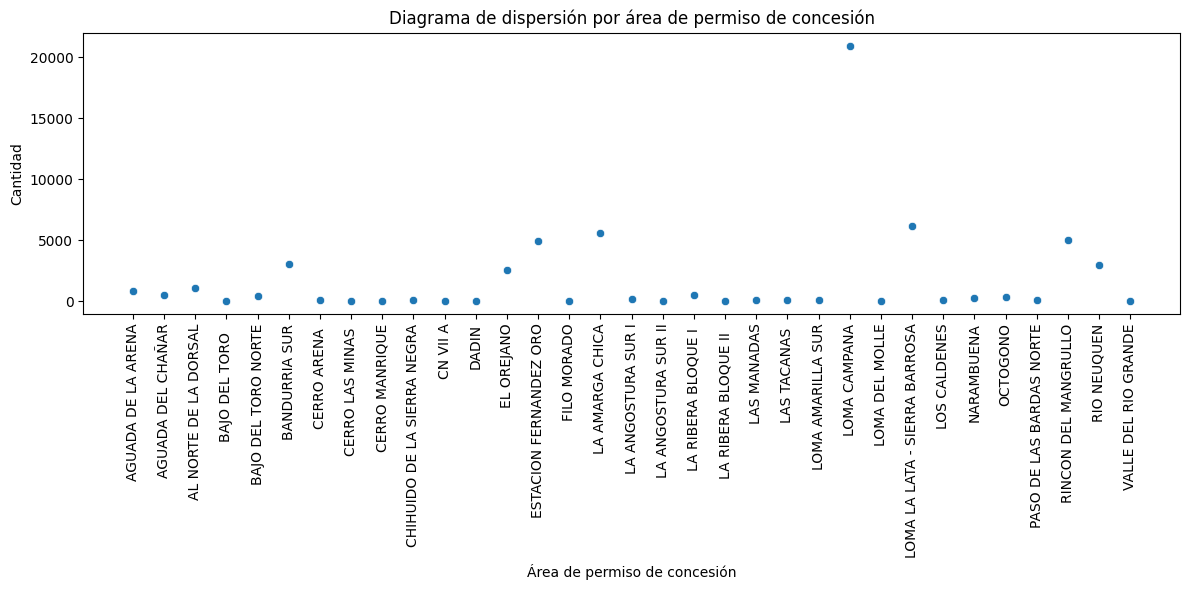

In [ ]:
#Representacion Grafica Area de permiso de concesión
area_counts = prod_ypf.groupby('Area de permiso de concesion').size().reset_index(name='Cantidad')
plt.figure(figsize=(12, 6))
sns.scatterplot(data=area_counts, x='Area de permiso de concesion', y='Cantidad')  #

plt.xticks(rotation=90)
plt.xlabel('Área de permiso de concesión')
plt.ylabel('Cantidad')
plt.title('Diagrama de dispersión por área de permiso de concesión')
plt.tight_layout()

plt.show()

In [ ]:
#Loma campana es el área de permiso de concesión mayoritaria para YPF
prod_ypf['Area de permiso de concesion'].value_counts(normalize=True)

,proportion
Area de permiso de concesion,
LOMA CAMPANA,0.371105
LOMA LA LATA - SIERRA BARROSA,0.108671
LA AMARGA CHICA,0.098763
RINCON DEL MANGRULLO,0.089386
ESTACION FERNANDEZ ORO,0.087277
BANDURRIA SUR,0.054256
RIO NEUQUEN,0.053157
EL OREJANO,0.045092
AL NORTE DE LA DORSAL,0.019143


In [ ]:
#Areas de yacimientos
prod_ypf.groupby('areayacimiento')['areayacimiento'].count()

,areayacimiento
areayacimiento,
AGUADA DE LA ARENA,832
BAJO DEL TORO,54
BAJO DEL TORO NORTE,428
BANDURRIA SUR,3061
BARDA GONZALEZ,54
BARREALES COLORADOS,27
BARROSA NORTE,567
CAMPAMENTO DOS,27
CERRO ARENA,108


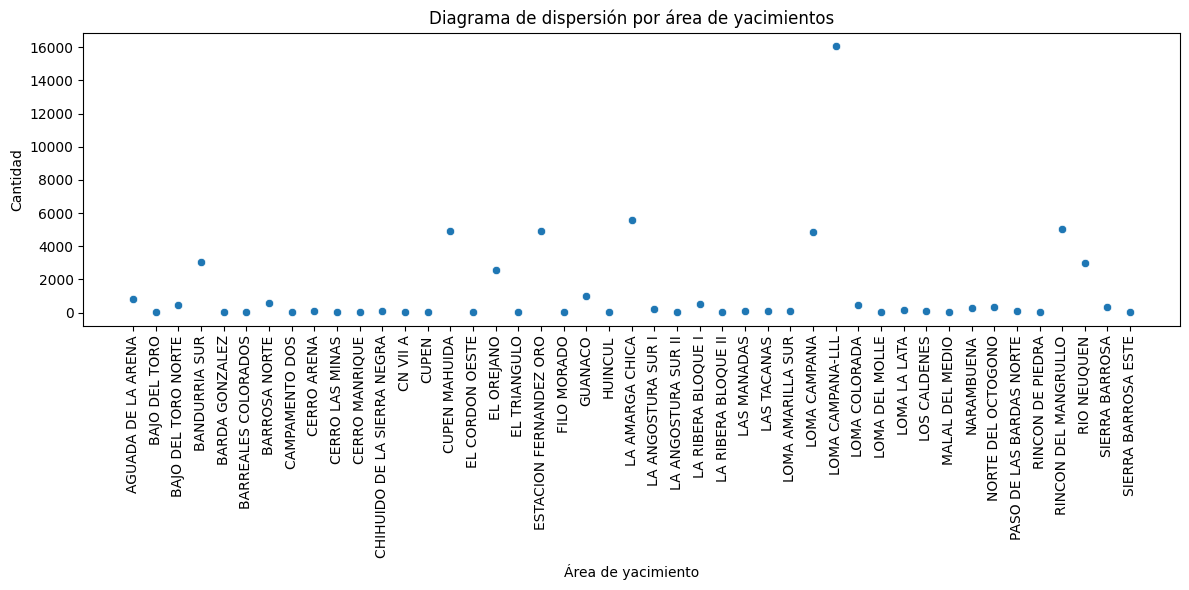

In [ ]:
# Grafico de dispersion por Area de Yacimientos

# Contando la cantidad de registros por área de yacimiento
area_counts = prod_ypf.groupby('areayacimiento').size().reset_index(name='Cantidad')

# Creando una figura con tamaño específico (12x6 pulgadas)
plt.figure(figsize=(12, 6))

# Generando un gráfico de dispersión que muestra la cantidad de registros por área
sns.scatterplot(data=area_counts, x='areayacimiento', y='Cantidad')

# Rotando las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)
# Estableciendo etiqueta para el eje x
plt.xlabel('Área de yacimiento')
# Estableciendo etiqueta para el eje y
plt.ylabel('Cantidad')
# Añadiendo título al gráfico
plt.title('Diagrama de dispersión por área de yacimientos')
# Ajustando automáticamente los márgenes para evitar cortes en las etiquetas
plt.tight_layout()
plt.show()

In [ ]:
#Para el feature de area de yacimiento también Loma Campana es el área mayoritaria para YPF
prod_ypf['areayacimiento'].value_counts(normalize=True)

,proportion
areayacimiento,
LOMA CAMPANA-LLL,0.284838
LA AMARGA CHICA,0.098763
RINCON DEL MANGRULLO,0.088908
ESTACION FERNANDEZ ORO,0.087277
CUPEN MAHUIDA,0.087100
LOMA CAMPANA,0.086267
BANDURRIA SUR,0.054256
RIO NEUQUEN,0.053157
EL OREJANO,0.045092


Es importante incorporar una definición respecto del hidrocarburo no convencional, ya que el dataset se centra en este tipo de hidrocarburo. El hidrocarburo no convencional son aquellos hidrocarburos que están contenidos en formaciones geológicas con características físicas que impiden su flujo natural hacia el pozo. Por eso, requieren tecnologías especiales como la fractura hidráulica (fracking) y los pozos horizontales para ser explotados de manera rentable.

In [ ]:
#La totalidad de los registros son de tipo de recurso no convencional
prod_ypf.groupby('Tipo de recurso')['Tipo de recurso'].count()

,Tipo de recurso
Tipo de recurso,
NO CONVENCIONAL,56418


En el caso de la diferencia entre shale y tigh, esta radica para el caso del shale la roca sedimentaria. El shale es la roca madre y a la vez el reservorio (auto generador y auto contenedor), para su producción se necesita fractura hidraúlica y pozos horizontales para liberar el gas o el petróleo atrapado en la matriz de la roca. En cambio para el tipo tight el tipo de roca es arenisca, caliza o dolomita muy compacta. En  este caso la roca no es generadora, solo almacena el hidrocarburo que migró desde otra roca madre. Para su producción también requiere fractura hidraúlica, pero a veces con menor intensidad.

In [ ]:

prod_ypf.groupby('Subtipo de recurso')['Subtipo de recurso'].count()

,Subtipo de recurso
Subtipo de recurso,
SHALE,37113
TIGHT,19305


In [ ]:
prod_ypf['Subtipo de recurso'].value_counts(normalize=True)

,proportion
Subtipo de recurso,
SHALE,0.657822
TIGHT,0.342178


In [ ]:
prod_ypf.groupby(by=['Tipo de recurso','Subtipo de recurso','areayacimiento','Tipo de pozo'])["Produccion de Petroleo"].mean()


Tipo de recurso  Subtipo de recurso  areayacimiento       Tipo de pozo
NO CONVENCIONAL  SHALE               AGUADA DE LA ARENA   Gasífero        36.601448
                                                          Otro tipo        0.000000
                                     BAJO DEL TORO        Otro tipo        0.000000
                                                          Sumidero         0.000000
                                     BAJO DEL TORO NORTE  Otro tipo        0.000000
                                                                            ...    
                 TIGHT               RIO NEUQUEN          Otro tipo        0.000000
                                                          Petrolífero      0.766667
                                     SIERRA BARROSA       Gasífero         0.000000
                                                          Otro tipo        0.000000
                                     SIERRA BARROSA ESTE  Gasífero         0.000000
Name: Produccion de Petroleo, Length: 91, dtype: float64

En este gráfico de histograma se puede observar que el tipo de pozo que se prioriza en este dataset, para el caso de YPF, son los petrolíferos con 30.000 registros y luego continuan los gasíferos con 20.000 registros. Por lo que nos da una visión más clara de la importancia relativa de cada tipo de pozo en la base de datos. Así como también permite analizar si los otros tipos de pozo como sudimero son representativos o no en nuestro dataset.

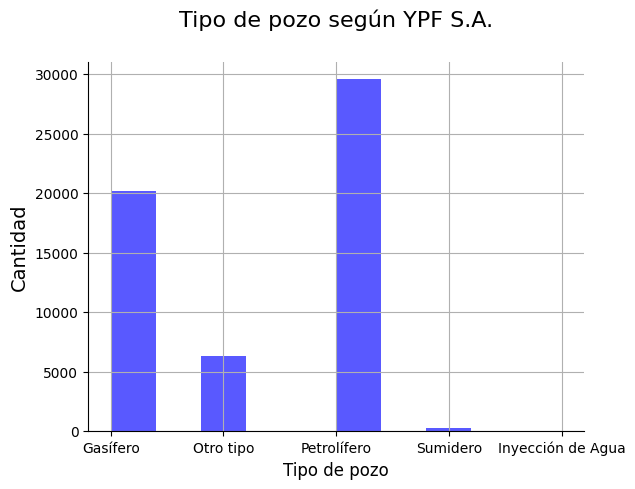

In [ ]:
plt.figure()
plt.hist(prod_ypf['Tipo de pozo'].dropna(), bins=10, color="blue", alpha=0.65)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Tipo de pozo", size=12)
plt.title("Tipo de pozo según YPF S.A.", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True)
plt.show()

En el histograma a continuación se analiza los subtipo de recurso, que existen dos, shale y tight. Como se puede observar el subtipo de recurso Shale duplica al Tight, y esto se puede dar por se han perforados más pozos Shale, hay más registros asociados a Shale y la actividad o exploración ha sido más intensa en formaciones Shale.

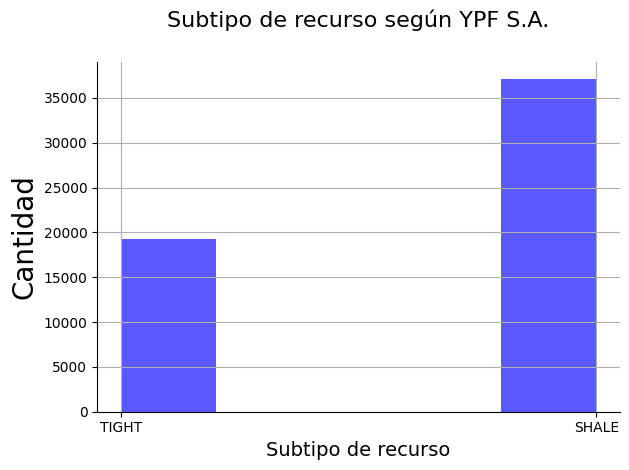

In [ ]:
plt.figure()
plt.hist(prod_ypf['Subtipo de recurso'].dropna(), bins=5, color="blue", alpha=0.65, width=0.2) #con width tratamos de acercar las columnas
plt.ylabel("Cantidad", size=20)
plt.xlabel("Subtipo de recurso", size=14)
plt.title("Subtipo de recurso según YPF S.A.", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.grid(True)
plt.show()

En el siguiente histograma se puede visualizar los diferentes tipos de extracción de petróleo y gas. La mayoría de los pozos usan la surgencia natural (donde el recurso fluje naturalmente a la superficie por la presión del yacimiento), plunger lift y bombeo mecánico son también comunes pero en menor medida.

Se puede inferir que la elección del método de extracción depende del tipo de pozo y recurso (gas o petróleo), así como de la presión del petróleo. Lo que nos surgiere el gráfico es que al haber muchos pozos con surgencia natural puede indicar: yacimientos jóvenes o buena presión, y menores costos operativos ya que no requieren sistemas mecánicos.

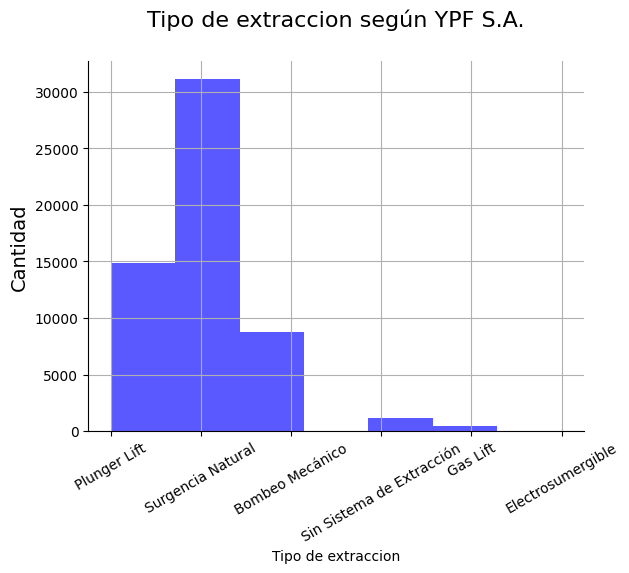

In [ ]:
plt.figure()
plt.hist(prod_ypf['Tipo de extraccion'].dropna(), bins=7, color="blue", alpha=0.65)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Tipo de extraccion", size=10)
plt.title("Tipo de extraccion según YPF S.A.", size=16, pad=25)
plt.xticks(rotation=30)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True)
plt.show()

In [ ]:
boxplot_prod_ypf=prod_ypf.melt(id_vars=['Subtipo de recurso'], value_vars=['Produccion de Petroleo','Produccion de Gas'])
boxplot_prod_ypf = boxplot_prod_ypf[boxplot_prod_ypf['value'] != 0]
boxplot_prod_ypf

,Subtipo de recurso,variable,value
0,TIGHT,Produccion de Petroleo,32.29
4,SHALE,Produccion de Petroleo,55.99
6,SHALE,Produccion de Petroleo,1009.83
8,SHALE,Produccion de Petroleo,10.44
9,SHALE,Produccion de Petroleo,656.64
...,...,...,...
112828,SHALE,Produccion de Gas,1.04
112829,SHALE,Produccion de Gas,203.65
112830,SHALE,Produccion de Gas,168.20
112832,SHALE,Produccion de Gas,101.18


Probamos hacer un boxplot para visualizar de manera resumida y clara la distribución estadística de una variable numérica. Este gráfico hace comparar la distribución de producción (de petróleo y gas) para cada subtipo de recurso (Tight y Shale), en función de cada producción.

Para este gráfico se puede visualizar que Shale tiene valores más altos y más dispersión que Tight, especialmente en producción de gas. También se puede visualizar que hay muchos outliers. La producción de gas tiene muchos valores extremos y un sesgo positivo - cola hacia arriba.

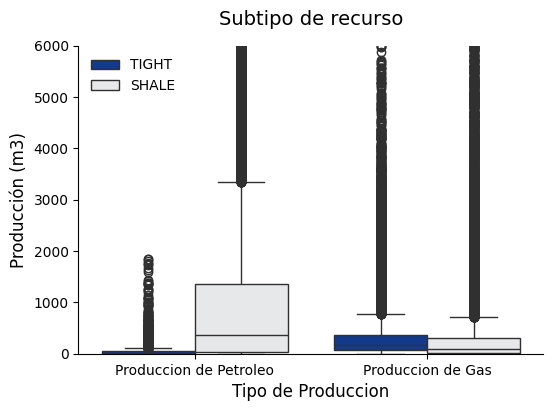

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="variable", y="value", data=boxplot_prod_ypf, palette=['#0033A0', '#E6E8EB'], hue='Subtipo de recurso')
plt.ylim(0,6000)
plt.title('Subtipo de recurso', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Tipo de Produccion', size=12)
plt.ylabel('Producción (m3)', size=12)
sns.despine()
plt.show()

# Detección de Outliers

(0.0, 5000.0)

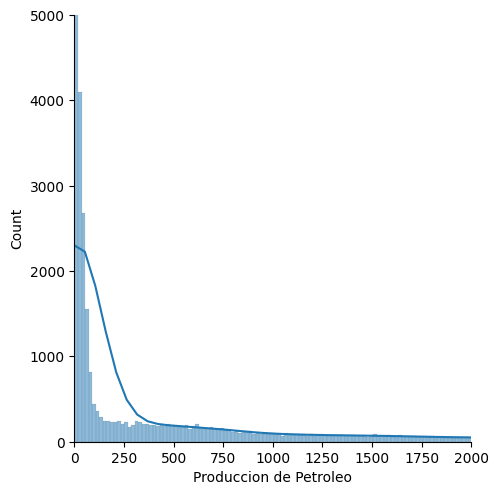

In [ ]:
#El gráfico muestra la frecuencia de los valores de producción de petroleo, se puede observar que los datos estan sesgados
sns.displot(prod_ypf['Produccion de Petroleo'], kde=True)
sns.despine()

# Ajustar los límites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 5000])

(0.0, 4000.0)

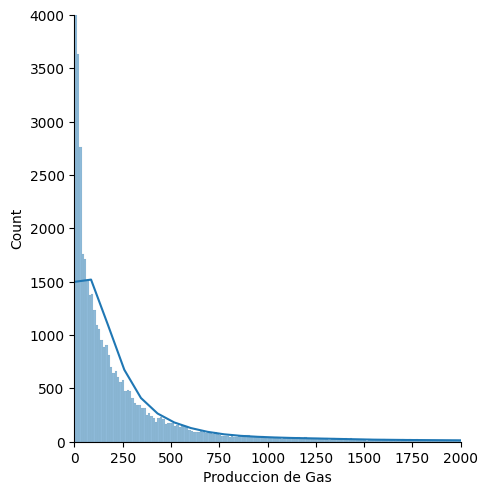

In [ ]:
#El gráfico muestra la frecuencia de los valores de producción de gas, se puede observar que los datos estan sesgados
sns.displot(prod_ypf['Produccion de Gas'], kde=True)
sns.despine()

# Ajustar los límites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 4000])

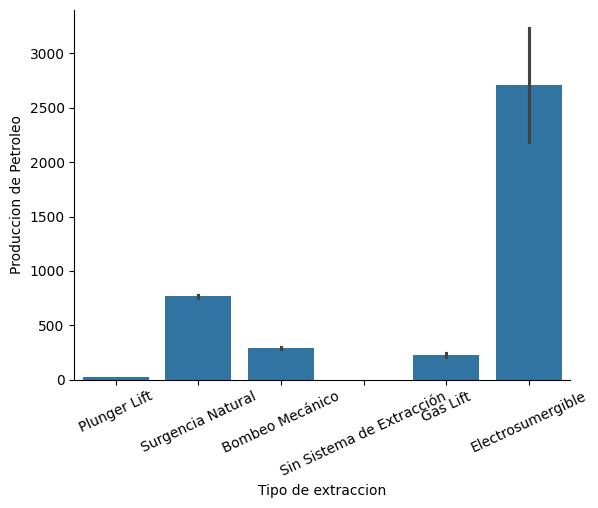

In [ ]:
ax = sns.barplot(x='Tipo de extraccion', y='Produccion de Petroleo', data=prod_ypf)
plt.xticks(rotation=25)
#despine es quitar los bordes, las espinas
sns.despine()

In [ ]:
#Se probo realizar el Z-core como herramienta para evaluar los outliers, pero no se obtuvo resultados. Si bien intentamos encontrar el conflicto no obtuvimos un resultado positivo.
z = stats.zscore(np.array(prod_ypf['Produccion de Petroleo']))

In [ ]:
threshold = 500

In [ ]:
z_index = prod_ypf['Produccion de Petroleo'][np.abs(z) < threshold].index
prod_ypf_withzscore = prod_ypf.loc[z_index]

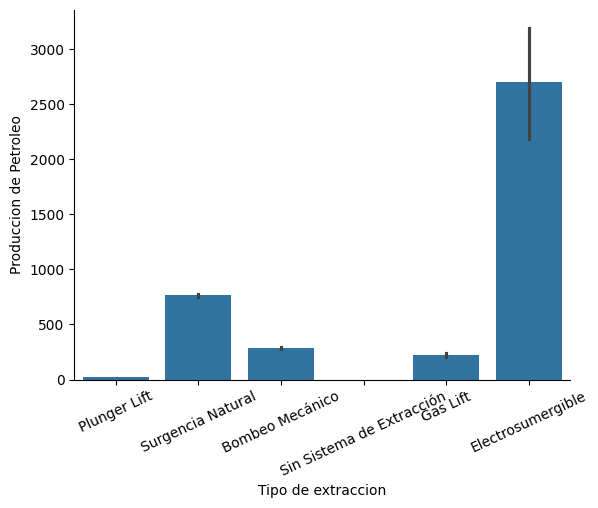

In [ ]:
sns.barplot(x='Tipo de extraccion',y='Produccion de Petroleo',data= prod_ypf_withzscore)
plt.xticks(rotation=25)
sns.despine()

In [ ]:
#Rango Intercuartilicos
q1 = prod_ypf['Produccion de Petroleo'].quantile(0.25)
q3 = prod_ypf['Produccion de Petroleo'].quantile(0.75)

In [ ]:
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [ ]:
bf = prod_ypf[(prod_ypf['Produccion de Petroleo'] > lb) & (prod_ypf['Produccion de Petroleo'] < ub)]

In [ ]:
bf.reset_index(drop=True, inplace=True)

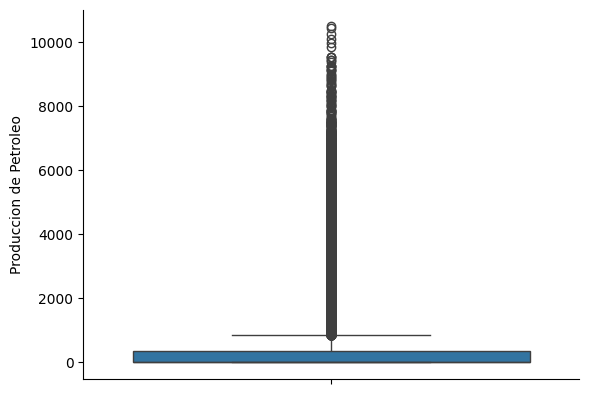

In [ ]:
sns.boxplot(prod_ypf['Produccion de Petroleo'])
sns.despine()

# Procesamiento de los datos

In [ ]:
prod_ypf.head(15)

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,153522,32.29,172.10,0.00,Plunger Lift,Extracción Efectiva,Gasífero,YPF S.A.,3844.0,...,ESTACION FERNANDEZ ORO,NEUQUINA,Rio Negro,-67.810843,-39.024083,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT
8578,2025,156742,0.00,0.00,0.00,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,2827.0,...,EL OREJANO,NEUQUINA,Neuquén,-69.179098,-38.009987,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8584,2025,156744,0.00,0.00,0.00,Bombeo Mecánico,En Estudio,Otro tipo,YPF S.A.,2977.0,...,LA AMARGA CHICA,NEUQUINA,Neuquén,-68.748543,-38.176774,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8590,2025,155827,0.00,0.00,0.00,Surgencia Natural,Abandonado,Otro tipo,YPF S.A.,4092.0,...,EL OREJANO,NEUQUINA,Neuquén,-69.200359,-37.958765,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8596,2025,156756,55.99,3.37,0.00,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,4945.0,...,LOMA CAMPANA,NEUQUINA,Neuquén,-68.678007,-38.329983,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8602,2025,159026,0.00,0.00,0.00,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,YPF S.A.,4902.0,...,LA AMARGA CHICA,NEUQUINA,Neuquén,-68.748658,-38.176370,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8608,2025,161951,1009.83,178.68,204.18,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,6096.0,...,LA AMARGA CHICA,NEUQUINA,Neuquén,-68.654683,-38.278314,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8614,2025,137233,0.00,0.00,0.00,Sin Sistema de Extracción,En Espera de Reparación,Otro tipo,YPF S.A.,2352.0,...,MALAL DEL MEDIO,NEUQUINA,Mendoza,-69.620400,-36.206000,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8620,2025,153596,10.44,22.34,4.04,Plunger Lift,Extracción Efectiva,Petrolífero,YPF S.A.,3069.0,...,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,-68.917707,-38.318816,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE
8626,2025,158892,656.64,188.55,68.97,Surgencia Natural,Extracción Efectiva,Petrolífero,YPF S.A.,5065.0,...,BANDURRIA SUR,NEUQUINA,Neuquén,-68.685679,-38.327307,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE


Transformación de variables: En este caso aplicamos LabelEncoder que es la manera más apta para transformar nuestras features ya que a todas las que aplicamos constan de más de una categoría.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
test_encoder = LabelEncoder()

In [ ]:
cols_to_encode = ['Tipo de extraccion', 'Tipo de estado', 'Tipo de pozo', 'Tipo de recurso', 'Subtipo de recurso', 'areayacimiento', 'Area de permiso de concesion']

In [ ]:
for col in cols_to_encode:
    prod_ypf.loc[:, col] = test_encoder.fit_transform(prod_ypf[col])

In [ ]:
prod_ypf.head(15)

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,153522,32.29,172.10,0.00,3,9,0,YPF S.A.,3844.0,...,18,NEUQUINA,Rio Negro,-67.810843,-39.024083,0,GAS PLUS,EXPLOTACION,DESARROLLO,1
8578,2025,156742,0.00,0.00,0.00,5,1,2,YPF S.A.,2827.0,...,16,NEUQUINA,Neuquén,-69.179098,-38.009987,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8584,2025,156744,0.00,0.00,0.00,0,4,2,YPF S.A.,2977.0,...,22,NEUQUINA,Neuquén,-68.748543,-38.176774,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8590,2025,155827,0.00,0.00,0.00,5,1,2,YPF S.A.,4092.0,...,16,NEUQUINA,Neuquén,-69.200359,-37.958765,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8596,2025,156756,55.99,3.37,0.00,5,9,3,YPF S.A.,4945.0,...,30,NEUQUINA,Neuquén,-68.678007,-38.329983,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8602,2025,159026,0.00,0.00,0.00,0,14,3,YPF S.A.,4902.0,...,22,NEUQUINA,Neuquén,-68.748658,-38.176370,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8608,2025,161951,1009.83,178.68,204.18,5,9,3,YPF S.A.,6096.0,...,22,NEUQUINA,Neuquén,-68.654683,-38.278314,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8614,2025,137233,0.00,0.00,0.00,4,3,2,YPF S.A.,2352.0,...,36,NEUQUINA,Mendoza,-69.620400,-36.206000,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8620,2025,153596,10.44,22.34,4.04,3,9,3,YPF S.A.,3069.0,...,31,NEUQUINA,Neuquén,-68.917707,-38.318816,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8626,2025,158892,656.64,188.55,68.97,5,9,3,YPF S.A.,5065.0,...,3,NEUQUINA,Neuquén,-68.685679,-38.327307,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0


Re Escalado

En este caso utilizamos MinMaxScaler ya que los datos están dispersos y la distancia entre los mismos es amplia, por lo que podemos dejar los datos dentro de un rango específico.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

(0.0, 4000.0)

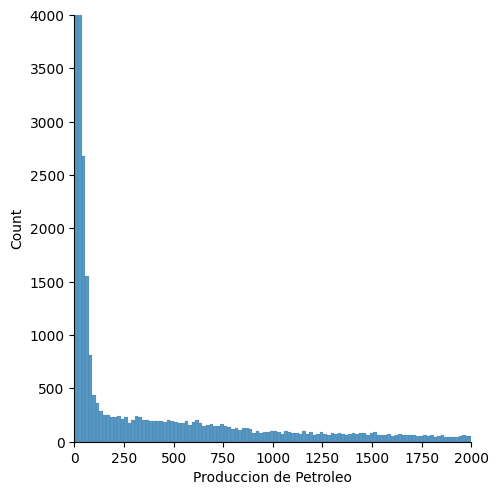

In [ ]:
sns.displot(prod_ypf['Produccion de Petroleo'])

# Ajustar los límites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 4000])


(0.0, 4000.0)

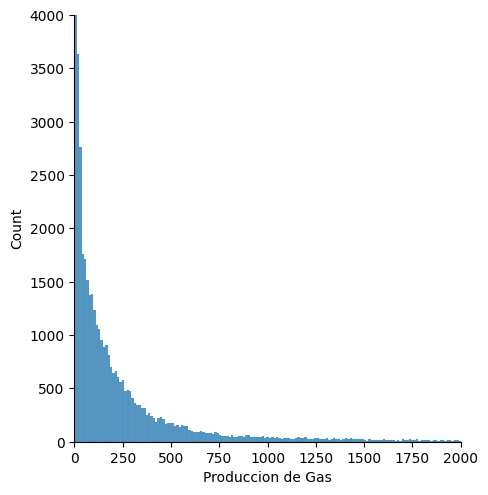

In [ ]:
sns.displot(prod_ypf['Produccion de Gas'])

# Ajustar los límites de los ejes
plt.xlim([0, 2000])
plt.ylim([0, 4000])


In [ ]:
#El rango que elegimos va de 0 a 40 ya que consideramos que es la máxima escala para nuestras categorías según las features utilizadas.
scaler = MinMaxScaler(feature_range=(0, 40), copy=True)

In [ ]:
prod_ypf['Produccion de Petroleo'] = scaler.fit_transform(prod_ypf[['Produccion de Petroleo']])

In [ ]:
prod_ypf.head(15)

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,153522,0.123135,172.10,0.00,3,9,0,YPF S.A.,3844.0,...,18,NEUQUINA,Rio Negro,-67.810843,-39.024083,0,GAS PLUS,EXPLOTACION,DESARROLLO,1
8578,2025,156742,0.000000,0.00,0.00,5,1,2,YPF S.A.,2827.0,...,16,NEUQUINA,Neuquén,-69.179098,-38.009987,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8584,2025,156744,0.000000,0.00,0.00,0,4,2,YPF S.A.,2977.0,...,22,NEUQUINA,Neuquén,-68.748543,-38.176774,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8590,2025,155827,0.000000,0.00,0.00,5,1,2,YPF S.A.,4092.0,...,16,NEUQUINA,Neuquén,-69.200359,-37.958765,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8596,2025,156756,0.213514,3.37,0.00,5,9,3,YPF S.A.,4945.0,...,30,NEUQUINA,Neuquén,-68.678007,-38.329983,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8602,2025,159026,0.000000,0.00,0.00,0,14,3,YPF S.A.,4902.0,...,22,NEUQUINA,Neuquén,-68.748658,-38.176370,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8608,2025,161951,3.850910,178.68,204.18,5,9,3,YPF S.A.,6096.0,...,22,NEUQUINA,Neuquén,-68.654683,-38.278314,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8614,2025,137233,0.000000,0.00,0.00,4,3,2,YPF S.A.,2352.0,...,36,NEUQUINA,Mendoza,-69.620400,-36.206000,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8620,2025,153596,0.039812,22.34,4.04,3,9,3,YPF S.A.,3069.0,...,31,NEUQUINA,Neuquén,-68.917707,-38.318816,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8626,2025,158892,2.504047,188.55,68.97,5,9,3,YPF S.A.,5065.0,...,3,NEUQUINA,Neuquén,-68.685679,-38.327307,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0


In [ ]:
prod_ypf['Produccion de Petroleo'].describe()

,Produccion de Petroleo
count,56418.000000
mean,1.812248
std,4.148629
min,0.000000
25%,0.000000
50%,0.052396
75%,1.312152
max,40.000000


(0.0, 200.0)

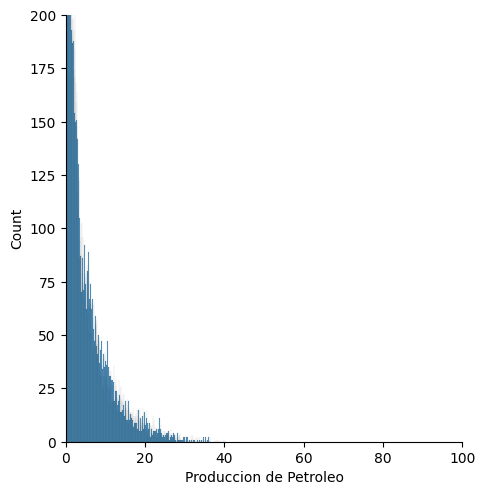

In [ ]:
sns.displot(prod_ypf['Produccion de Petroleo'])

# Ajustar los límites de los ejes
plt.xlim([0, 100])
plt.ylim([0, 200])

In [ ]:
#El rango que elegimos va de 0 a 40 ya que consideramos que es la máxima escala para nuestras categorías según las features utilizadas.
scaler = MinMaxScaler(feature_range=(0, 40), copy=True)

In [ ]:
prod_ypf['Produccion de Gas'] = scaler.fit_transform(prod_ypf[['Produccion de Gas']])

In [ ]:
prod_ypf.head(15)

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,areayacimiento,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso
8572,2025,153522,0.123135,0.401562,0.00,3,9,0,YPF S.A.,3844.0,...,18,NEUQUINA,Rio Negro,-67.810843,-39.024083,0,GAS PLUS,EXPLOTACION,DESARROLLO,1
8578,2025,156742,0.000000,0.000000,0.00,5,1,2,YPF S.A.,2827.0,...,16,NEUQUINA,Neuquén,-69.179098,-38.009987,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8584,2025,156744,0.000000,0.000000,0.00,0,4,2,YPF S.A.,2977.0,...,22,NEUQUINA,Neuquén,-68.748543,-38.176774,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8590,2025,155827,0.000000,0.000000,0.00,5,1,2,YPF S.A.,4092.0,...,16,NEUQUINA,Neuquén,-69.200359,-37.958765,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8596,2025,156756,0.213514,0.007863,0.00,5,9,3,YPF S.A.,4945.0,...,30,NEUQUINA,Neuquén,-68.678007,-38.329983,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8602,2025,159026,0.000000,0.000000,0.00,0,14,3,YPF S.A.,4902.0,...,22,NEUQUINA,Neuquén,-68.748658,-38.176370,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8608,2025,161951,3.850910,0.416915,204.18,5,9,3,YPF S.A.,6096.0,...,22,NEUQUINA,Neuquén,-68.654683,-38.278314,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8614,2025,137233,0.000000,0.000000,0.00,4,3,2,YPF S.A.,2352.0,...,36,NEUQUINA,Mendoza,-69.620400,-36.206000,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8620,2025,153596,0.039812,0.052126,4.04,3,9,3,YPF S.A.,3069.0,...,31,NEUQUINA,Neuquén,-68.917707,-38.318816,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0
8626,2025,158892,2.504047,0.439945,68.97,5,9,3,YPF S.A.,5065.0,...,3,NEUQUINA,Neuquén,-68.685679,-38.327307,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0


In [ ]:
prod_ypf['Produccion de Gas'].describe()

,Produccion de Gas
count,56418.000000
mean,0.797867
std,2.411041
min,0.000000
25%,0.004037
50%,0.141900
75%,0.553821
max,40.000000


(0.0, 200.0)

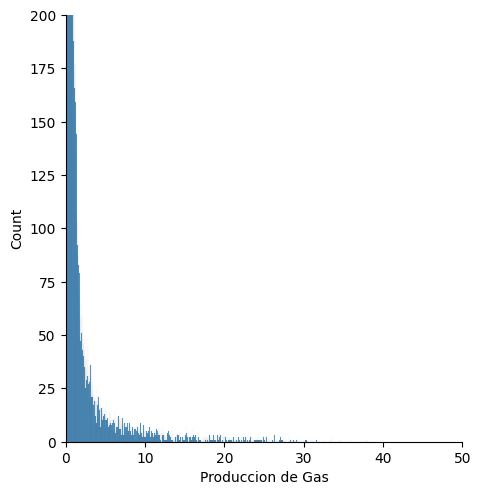

In [ ]:
sns.displot(prod_ypf['Produccion de Gas'])

# Ajustar los límites de los ejes
plt.xlim([0, 50])
plt.ylim([0, 200])

In [95]:
import geopandas as gpd
from shapely.geometry import Point

# Asegurate que las coordenadas estén en float y no tengan NaN
prod_ypf_clean = prod_ypf.dropna(subset=['coordenadax', 'coordenaday']).copy()

# Crear geometría (Point)
geometry = [Point(xy) for xy in zip(prod_ypf_clean['coordenadax'], prod_ypf_clean['coordenaday'])]

# Crear GeoDataFrame
gdf = gpd.GeoDataFrame(prod_ypf_clean, geometry=geometry)

# Definir sistema de coordenadas (CRS)
# Si las coordenadas están en WGS84 (lat/lon), usá EPSG:4326
# Si están en metros, por ejemplo UTM zona 20 sur: EPSG:32720
gdf.set_crs(epsg=4326, inplace=True)  # ← Ajustá si corresponde

,Año,ID pozo,Produccion de Petroleo,Produccion de Gas,Produccion de agua,Tipo de extraccion,Tipo de estado,Tipo de pozo,Empresa,Profundidad,...,Cuenca,Provincia,coordenadax,coordenaday,Tipo de recurso,Proyecto,Clasificacion,Subclasificacion,Subtipo de recurso,geometry
8572,2025,153522,0.123135,0.401562,0.00,3,9,0,YPF S.A.,3844.0,...,NEUQUINA,Rio Negro,-67.810843,-39.024083,0,GAS PLUS,EXPLOTACION,DESARROLLO,1,POINT (-67.81084 -39.02408)
8578,2025,156742,0.000000,0.000000,0.00,5,1,2,YPF S.A.,2827.0,...,NEUQUINA,Neuquén,-69.179098,-38.009987,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0,POINT (-69.1791 -38.00999)
8584,2025,156744,0.000000,0.000000,0.00,0,4,2,YPF S.A.,2977.0,...,NEUQUINA,Neuquén,-68.748543,-38.176774,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0,POINT (-68.74854 -38.17677)
8590,2025,155827,0.000000,0.000000,0.00,5,1,2,YPF S.A.,4092.0,...,NEUQUINA,Neuquén,-69.200359,-37.958765,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0,POINT (-69.20036 -37.95876)
8596,2025,156756,0.213514,0.007863,0.00,5,9,3,YPF S.A.,4945.0,...,NEUQUINA,Neuquén,-68.678007,-38.329983,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0,POINT (-68.67801 -38.32998)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199438,2024,166128,0.000000,0.000000,0.00,4,5,4,YPF S.A.,2046.0,...,NEUQUINA,Neuquén,-68.525949,-38.122077,0,Sin Proyecto,SERVICIO,CONTROL,0,POINT (-68.52595 -38.12208)
199440,2024,166126,6.264045,0.236084,1102.79,5,9,3,YPF S.A.,5889.0,...,NEUQUINA,Neuquén,-68.558082,-38.076855,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0,POINT (-68.55808 -38.07685)
199442,2024,166127,9.308950,0.357719,1287.65,5,9,3,YPF S.A.,0.0,...,NEUQUINA,Neuquén,-68.558013,-38.076854,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0,POINT (-68.55801 -38.07685)
199446,2024,166133,0.000000,0.000000,0.00,5,14,0,YPF S.A.,4491.0,...,NEUQUINA,Neuquén,-69.335181,-38.710951,0,Sin Proyecto,EXPLOTACION,DESARROLLO,0,POINT (-69.33518 -38.71095)


In [97]:
!pip install contextily

In [98]:
print(gdf.columns)

Index(['Año', 'ID pozo', 'Produccion de Petroleo', 'Produccion de Gas',
       'Produccion de agua', 'Tipo de extraccion', 'Tipo de estado',
       'Tipo de pozo', 'Empresa', 'Profundidad',
       'Area de permiso de concesion', 'areayacimiento', 'Cuenca', 'Provincia',
       'coordenadax', 'coordenaday', 'Tipo de recurso', 'Proyecto',
       'Clasificacion', 'Subclasificacion', 'Subtipo de recurso', 'geometry'],
      dtype='object')


In [99]:
print(gdf.dtypes)

Año                                int64
ID pozo                            int64
Produccion de Petroleo           float64
Produccion de Gas                float64
Produccion de agua               float64
Tipo de extraccion                object
Tipo de estado                    object
Tipo de pozo                      object
Empresa                           object
Profundidad                      float64
Area de permiso de concesion      object
areayacimiento                    object
Cuenca                            object
Provincia                         object
coordenadax                      float64
coordenaday                      float64
Tipo de recurso                   object
Proyecto                          object
Clasificacion                     object
Subclasificacion                  object
Subtipo de recurso                object
geometry                        geometry
dtype: object


Los siguientes gráficos permiten visualizar la ubicación de la producción de petróleo y gas por parte de YPF en estos últimos años en Vaca Muerta, como habíamos mencionado anteriormente la mayor producción se concentra en el área de yacimiento Loma Campana.

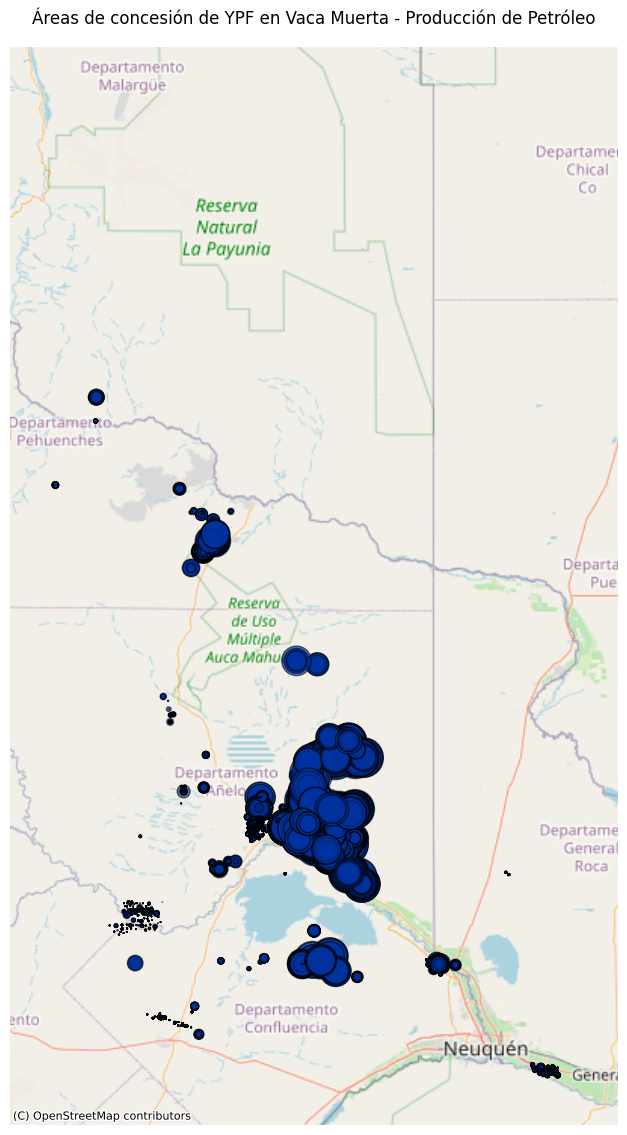

In [100]:
import contextily as ctx
import matplotlib.pyplot as plt

# Buscamos reproyectar a Web Mercator (para que se alinee con los mapas base)
# Web Mercator (EPSG:3857) es un sistema de proyección cartográfica ampliamente utilizado en mapas web como contextily en Python
gdf = gdf.to_crs(epsg=3857)

# Escalar tamaño de burbujas
gdf['scaled_area'] = gdf['Produccion de Petroleo'].astype(float)
gdf['scaled_area'] = gdf['scaled_area'] / gdf['scaled_area'].max() * 1000

# Plot
fig, ax = plt.subplots(figsize=(16, 14))

gdf.plot(
    ax=ax,
    markersize=gdf['scaled_area'],
    alpha=0.6,
    color='#0033A0',
    edgecolor='k'
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Fondo tipo mapa
ax.set_axis_off()
plt.title('Áreas de concesión de YPF en Vaca Muerta - Producción de Petróleo')
plt.show()

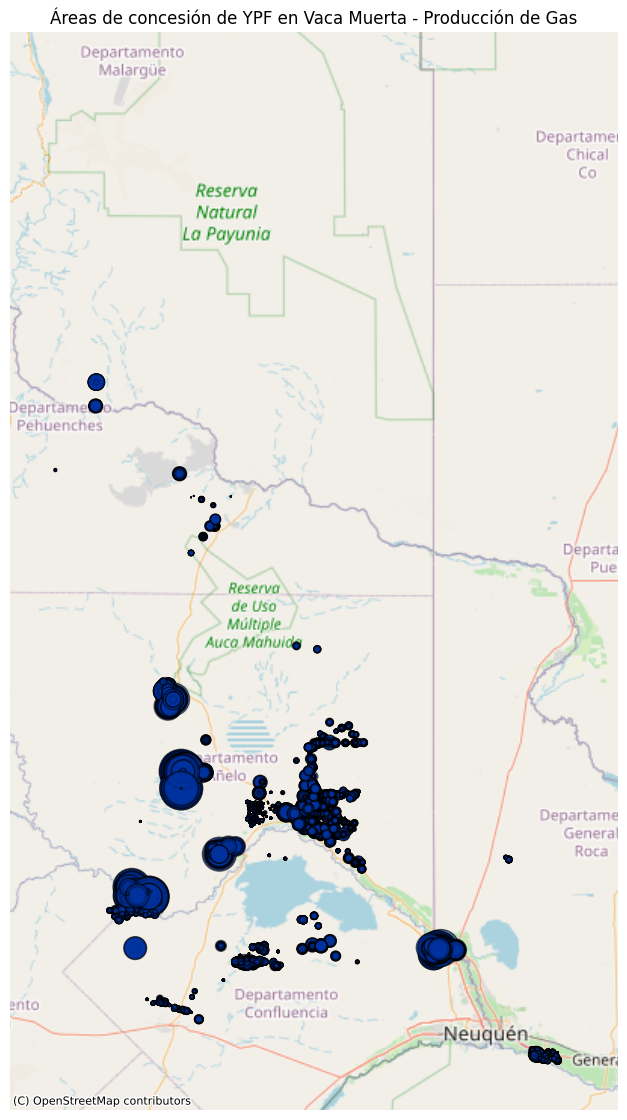

In [101]:
import contextily as ctx
import matplotlib.pyplot as plt

# Reproyectar a Web Mercator (para que se alinee con los mapas base)
gdf = gdf.to_crs(epsg=3857)

# Escalar tamaño de burbujas
gdf['scaled_area'] = gdf['Produccion de Gas'].astype(float)
gdf['scaled_area'] = gdf['scaled_area'] / gdf['scaled_area'].max() * 1000

# Plot
fig, ax = plt.subplots(figsize=(16, 14))

gdf.plot(
    ax=ax,
    markersize=gdf['scaled_area'],
    alpha=0.6,
    color='#0033A0',
    edgecolor='k'
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Fondo tipo mapa
ax.set_axis_off()
plt.title('Áreas de concesión de YPF en Vaca Muerta - Producción de Gas')
plt.show()